In [1]:
import pandas as pd
import plotly.graph_objects as go
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import numpy as np
warnings.filterwarnings("ignore")
plt.style.use('ggplot')
pd.set_option('display.max_columns', None)
import plotly.graph_objects as go
import random

from dash import Dash, html, dcc
from jupyter_dash import JupyterDash
from dash.dependencies import Output, Input
from dash.exceptions import PreventUpdate

In [2]:
data = pd.read_csv('crime_rate.csv').drop('Unnamed: 0', axis=1)

In [3]:
#Correct the mistake on the crime_rate data
data['Time Period'] = data['Time Period'].replace('1AM - 3AM', '12AM - 3AM')

In [4]:
data.head()

,DATE OCC,AREA NAME,Vict Age,Vict Sex,Vict Descent,Status,LOCATION,LAT,LON,Crime Category,Weapon Category,DATE OCC Month,Year,Time Period,Population,Crime Cnt,Crime Rate
0,2020-01-08,Southwest,36,F,Black,AO,1100 W 39TH PL,34.0141,-118.2978,Violent Crimes,Physical Force,2020-01-01,2020,9PM - 12AM,55859,11149,0.199592
1,2020-01-01,Central,25,M,Hispanic/Latino,IC,700 S HILL ST,34.0459,-118.2545,Violent Crimes,Unknown,2020-01-01,2020,3AM - 6AM,53150,11586,0.217987
2,2020-02-13,Central,30,Unknown,Other,AA,200 E 6TH ST,34.0448,-118.2474,Sex Crimes,Unknown,2020-02-01,2020,9AM - 12PM,53150,11586,0.217987
3,2020-01-01,N Hollywood,76,F,White,IC,5400 CORTEEN PL,34.1685,-118.4019,Crimes Against Property and Vehicles,Unknown,2020-01-01,2020,3PM - 6PM,39429,10151,0.257450
4,2020-01-01,Mission,31,Unknown,Other,IC,14400 TITUS ST,34.2198,-118.4468,Property Crimes,Unknown,2020-01-01,2020,3AM - 6AM,18895,8458,0.447632


In [5]:
#datetime
data['DATE OCC'] = pd.to_datetime(data['DATE OCC'])

In [6]:
#get the year 
data['Year'] = data['DATE OCC'].dt.year

In [7]:
#Drop the crime occurences date
data.drop(['DATE OCC'], axis=1, inplace=True)

In [8]:
#Vict Decsent Count in each area / among different ethnicity
data.groupby('AREA NAME')['Vict Descent'].value_counts().unstack()

Vict Descent,Asian,Black,Hispanic/Latino,Native American,Other,White
AREA NAME,,,,,,
77th Street,138,10385,8587,13,6512,724
Central,1507,5496,6416,26,6264,5022
Foothill,201,648,6598,1,3903,2765
Harbor,411,1759,6683,6,5880,2970
Hollenbeck,361,622,8513,7,4660,1643
Hollywood,730,2858,4389,22,7145,7073
Mission,437,881,9005,3,4544,1796
N Hollywood,334,1743,5149,6,6594,7222
Newton,353,3187,9608,9,5337,1379


In [9]:
#Vict Decsent Count in each area / among different ethnicity /in 2020 and 2021
data.groupby(['Year', 'AREA NAME'])['Vict Descent'].value_counts().unstack()

Vict Descent       Asian   Black  Hispanic/Latino  Native American   Other  \
Year AREA NAME                                                               
2020 77th Street    66.0  5248.0           4455.0              6.0  3188.0   
     Central       639.0  2626.0           2925.0              6.0  2899.0   
     Foothill       92.0   322.0           3243.0              NaN  1983.0   
     Harbor        186.0   846.0           3324.0              2.0  2982.0   
     Hollenbeck    147.0   312.0           4132.0              2.0  2358.0   
     Hollywood     301.0  1249.0           1980.0              7.0  3299.0   
     Mission       219.0   445.0           4511.0              NaN  2370.0   
     N Hollywood   145.0   802.0           2495.0              1.0  3220.0   
     Newton        163.0  1590.0           4833.0              1.0  2731.0   
     Northeast     343.0   311.0           2533.0              7.0  2964.0   
     Olympic      1089.0   925.0           3240.0              5.0  3367.0   
     Pacific       422.0  1172.0           1455.0              2.0  4207.0   
     Rampart       303.0  1000.0           3675.0              5.0  2741.0   
     Southeast      66.0  3758.0           4120.0              1.0  2643.0   
     Southwest     291.0  3704.0           3270.0             28.0  2973.0   
     Topanga       252.0   596.0           1841.0              5.0  2600.0   
     Van Nuys      222.0   769.0           2549.0              4.0  2626.0   
     West LA       546.0   517.0            875.0              7.0  3140.0   
     West Valley   197.0   489.0           2122.0              3.0  2338.0   
     Wilshire      509.0  1424.0           1876.0              4.0  2436.0   
2021 77th Street    72.0  5137.0           4132.0              7.0  3324.0   
     Central       868.0  2870.0           3491.0             20.0  3365.0   
     Foothill      109.0   326.0           3355.0              1.0  1920.0   
     Harbor        225.0   913.0           3359.0              4.0  2898.0   
     Hollenbeck    214.0   310.0           4381.0              5.0  2302.0   
     Hollywood     429.0  1609.0           2409.0             15.0  3846.0   
     Mission       218.0   436.0           4494.0              3.0  2174.0   
     N Hollywood   189.0   941.0           2654.0              5.0  3374.0   
     Newton        190.0  1597.0           4775.0              8.0  2606.0   
     Northeast     441.0   403.0           2742.0             14.0  3252.0   
     Olympic      1337.0  1129.0           3492.0              3.0  3649.0   
     Pacific       591.0  1429.0           1729.0             10.0  4437.0   
     Rampart       381.0  1088.0           3785.0             11.0  2894.0   
     Southeast      59.0  3589.0           3690.0              6.0  2841.0   
     Southwest     307.0  3655.0           3217.0             29.0  3289.0   
     Topanga       289.0   690.0           1998.0             27.0  2602.0   
     Van Nuys      234.0   742.0           2492.0              3.0  2610.0   
     West LA       689.0   627.0           1040.0              9.0  3221.0   
     West Valley   280.0   532.0           2269.0              3.0  2345.0   
     Wilshire      556.0  1489.0           1824.0              6.0  2861.0   

Vict Descent       White  
Year AREA NAME            
2020 77th Street   331.0  
     Central      2491.0  
     Foothill     1453.0  
     Harbor       1516.0  
     Hollenbeck    846.0  
     Hollywood    3304.0  
     Mission       913.0  
     N Hollywood  3488.0  
     Newton        656.0  
     Northeast    2284.0  
     Olympic       995.0  
     Pacific      4298.0  
     Rampart      1281.0  
     Southeast     229.0  
     Southwest     883.0  
     Topanga      2797.0  
     Van Nuys     2571.0  
     West LA      4203.0  
     West Valley  2917.0  
     Wilshire     3023.0  
2021 77th Street   393.0  
     Central      2531.0  
     Foothill     1312.0  
     Harbor       1454.0  
     Hollenbeck    79

In [10]:
#Crime cnt in different city among different ethnicity 
app = JupyterDash(__name__)

app.layout = html.Div([
    html.H3('AREA SELECTION:'),
    dcc.Dropdown(id='dropdown1',
                options=data['AREA NAME'].unique(),
                value='Central'),
    dcc.Graph(id='visual')
])

@app.callback(Output('visual', 'figure'), Input('dropdown1', 'value'))

def plot(area):
    
    df = pd.DataFrame(data.groupby('AREA NAME')['Vict Descent'].value_counts())\
         .rename(columns={'Vict Descent':'Cnt'}).reset_index()
    
    fig = px.bar(
        df.loc[df['AREA NAME']==area], 
        x='Vict Descent',
        y='Cnt',
        text_auto=True,
        color='Vict Descent'
    )
    
    return fig
    
if __name__ == '__main__':
    app.run_server(debug=True, mode='inline', port=5016)

In [12]:
#Victim Gender Cnt in each area name 
data.groupby('AREA NAME')['Vict Sex'].value_counts().unstack()

Vict Sex,F,M,Unknown
AREA NAME,,,
77th Street,11359,9032,5968
Central,7910,12895,3926
Foothill,5348,6387,2381
Harbor,6703,6191,4815
Hollenbeck,5412,6616,3778
Hollywood,7283,9686,5248
Mission,6451,6937,3278
N Hollywood,7383,10978,2687
Newton,6983,8140,4750


In [13]:
#Victim Gender Cnt in each area name in each year
data.groupby(['Year','AREA NAME'])['Vict Sex'].value_counts().unstack()

Vict Sex             F     M  Unknown
Year AREA NAME                       
2020 77th Street  5666  4691     2937
     Central      3695  6047     1844
     Foothill     2636  3233     1224
     Harbor       3314  3131     2411
     Hollenbeck   2643  3252     1902
     Hollywood    3269  4462     2409
     Mission      3202  3546     1710
     N Hollywood  3459  5385     1307
     Newton       3466  4101     2407
     Northeast    2841  3243     2358
     Olympic      3338  3637     2646
     Pacific      3618  4742     3196
     Rampart      3221  3609     2175
     Southeast    4818  3509     2490
     Southwest    4619  3978     2552
     Topanga      2921  4283      887
     Van Nuys     3254  3944     1543
     West LA      3315  3977     1996
     West Valley  2877  4221      968
     Wilshire     3500  4796      976
2021 77th Street  5693  4341     3031
     Central      4215  6848     2082
     Foothill     2712  3154     1157
     Harbor       3389  3060     2404
     Hollenbeck   2769  3364     1876
     Hollywood    4014  5224     2839
     Mission      3249  3391     1568
     N Hollywood  3924  5593     1380
     Newton       3517  4039     2343
     Northeast    3168  3539     2626
     Olympic      3830  4170     2797
     Pacific      4230  5312     3365
     Rampart      3340  3758     2343
     Southeast    4442  3317     2651
     Southwest    4625  3998     2753
     Topanga      3165  4474      927
     Van Nuys     3342  3703     1632
     West LA      3574  4368     1931
     West Valley  3088  4389     1038
     Wilshire     3504  4698     1514

In [14]:
#Crime Cnt in different city among each gender 
app = JupyterDash(__name__)

app.layout = html.Div([
    html.H3('AREA SELECTION:'),
    dcc.Dropdown(id='dropdown1',
                options=data['AREA NAME'].unique(),
                value='Central'),
    dcc.Graph(id='visual')
])

@app.callback(Output('visual', 'figure'), Input('dropdown1', 'value'))

def plot(area):
    
    df = pd.DataFrame(data.groupby('AREA NAME')['Vict Sex'].value_counts())\
         .rename(columns={'Vict Sex':'Cnt'}).reset_index()
    
    fig = px.bar(
        df.loc[df['AREA NAME']==area], 
        x='Vict Sex',
        y='Cnt',
        text_auto=True,
        color='Vict Sex'
    )
    
    return fig
    
if __name__ == '__main__':
    app.run_server(debug=True, mode='inline', port=5017)

In [15]:
#Age Group Categorization 

In [17]:
data['Vict Age'].min()

2

In [18]:
data['Vict Age'].max()

120

In [19]:
def age_group(data, col):
    groups = []  
    for x in data[col]:
        if x >= 0 and x <= 18:
            groups.append('0-18')
        elif x >= 19 and x <= 30:
            groups.append('19-30')
        elif x >= 31 and x <= 45:
            groups.append('31-45')
        elif x >= 46 and x <= 60:
            groups.append('46-60')
        elif x >= 61 and x <= 75:
            groups.append('61-75')
        elif x >= 76 and x <= 90:
            groups.append('76-90')
        elif x >= 91 and x <= 105:
            groups.append('91-105')
        elif x >= 106 and x <= 120:
            groups.append('106-120')
        else:
            groups.append('Unknown') 

    return groups

In [20]:
data['Age Group'] = age_group(data, 'Vict Age')

In [21]:
data['Age Group'].value_counts()

19-30      180095
31-45      102595
46-60       64147
61-75       27339
0-18        12556
76-90        4962
91-105        489
106-120         1
Name: Age Group, dtype: int64

In [40]:
#Crime Cnt among different age group in different area
data.groupby('AREA NAME')['Age Group'].value_counts().unstack()

Age Group,0-18,106-120,19-30,31-45,46-60,61-75,76-90,91-105
AREA NAME,,,,,,,,
77th Street,1375.0,NaN,11870.0,6686.0,4369.0,1785.0,245.0,29.0
Central,325.0,NaN,11722.0,6915.0,4105.0,1490.0,149.0,25.0
Foothill,619.0,NaN,5899.0,3710.0,2516.0,1161.0,197.0,14.0
Harbor,698.0,NaN,8406.0,4097.0,2952.0,1314.0,222.0,20.0
Hollenbeck,586.0,NaN,8057.0,3634.0,2391.0,950.0,163.0,25.0
Hollywood,365.0,NaN,11251.0,6206.0,3029.0,1153.0,203.0,10.0
Mission,832.0,NaN,7250.0,4485.0,2843.0,1049.0,188.0,19.0
N Hollywood,497.0,NaN,9794.0,5687.0,3321.0,1447.0,279.0,23.0
Newton,819.0,NaN,10314.0,4808.0,2960.0,863.0,93.0,16.0


In [24]:
#Crime Cnt among different age group in different area in each year
data.groupby(['Year', 'AREA NAME'])['Age Group'].value_counts().unstack()

Age Group          0-18  106-120   19-30   31-45   46-60   61-75  76-90  \
Year AREA NAME                                                            
2020 77th Street  708.0      NaN  6030.0  3337.0  2193.0   895.0  119.0   
     Central      153.0      NaN  5501.0  3082.0  2009.0   760.0   72.0   
     Foothill     310.0      NaN  3070.0  1834.0  1200.0   567.0  103.0   
     Harbor       353.0      NaN  4208.0  2068.0  1449.0   657.0  114.0   
     Hollenbeck   302.0      NaN  4016.0  1743.0  1181.0   465.0   79.0   
     Hollywood    167.0      NaN  5106.0  2766.0  1484.0   520.0   92.0   
     Mission      442.0      NaN  3685.0  2294.0  1406.0   536.0   86.0   
     N Hollywood  256.0      NaN  4703.0  2677.0  1679.0   706.0  117.0   
     Newton       401.0      NaN  5201.0  2365.0  1520.0   438.0   42.0   
     Northeast    233.0      NaN  3994.0  2135.0  1381.0   565.0  121.0   
     Olympic      300.0      NaN  4842.0  2346.0  1450.0   567.0  107.0   
     Pacific      206.0      NaN  5442.0  2991.0  1909.0   836.0  161.0   
     Rampart      299.0      NaN  4558.0  2375.0  1201.0   481.0   79.0   
     Southeast    558.0      NaN  5183.0  2651.0  1681.0   647.0   89.0   
     Southwest    513.0      NaN  5289.0  2588.0  1760.0   833.0  143.0   
     Topanga      272.0      NaN  2701.0  2408.0  1798.0   727.0  169.0   
     Van Nuys     257.0      NaN  3404.0  2600.0  1642.0   693.0  129.0   
     West LA      187.0      1.0  3749.0  2376.0  1724.0   959.0  257.0   
     West Valley  263.0      NaN  3379.0  2018.0  1440.0   797.0  151.0   
     Wilshire     208.0      NaN  3690.0  2809.0  1703.0   722.0  126.0   
2021 77th Street  667.0      NaN  5840.0  3349.0  2176.0   890.0  126.0   
     Central      172.0      NaN  6221.0  3833.0  2096.0   730.0   77.0   
     Foothill     309.0      NaN  2829.0  1876.0  1316.0   594.0   94.0   
     Harbor       345.0      NaN  4198.0  2029.0  1503.0   657.0  108.0   
     Hollenbeck   284.0      NaN  4041.0  1891.0  1210.0   485.0   84.0   
     Hollywood    198.0      NaN  6145.0  3440.0  1545.0   633.0  111.0   
     Mission      390.0      NaN  3565.0  2191.0  1437.0   513.0  102.0   
     N Hollywood  241.0      NaN  5091.0  3010.0  1642.0   741.0  162.0   
     Newton       418.0      NaN  5113.0  2443.0  1440.0   425.0   51.0   
     Northeast    216.0      NaN  4347.0  2467.0  1461.0   702.0  129.0   
     Olympic      317.0      NaN  5380.0  2715.0  1538.0   700.0  138.0   
     Pacific      209.0      NaN  6074.0  3405.0  2082.0   944.0  180.0   
     Rampart      313.0      NaN  4716.0  2575.0  1261.0   498.0   73.0   
     Southeast    469.0      NaN  4987.0  2672.0  1565.0   627.0   79.0   
     Southwest    538.0      NaN  5621.0  2567.0  1651.0   843.0  146.0   
     Topanga      246.0      NaN  2731.0  2729.0  1951.0   734.0  164.0   
     Van Nuys     211.0      NaN  3498.0  2488.0  1619.0   725.0  126.0   
     West LA      170.0      NaN  3964.0  2580.0  1824.0  1014.0  291.0   
     West Valley  266.0      NaN  3635.0  2178.0  1470.0   763.0  190.0   
     Wilshire     189.0      NaN  4348.0  2694.0  1550.0   750.0  175.0   

Age Group         91-105  
Year AREA NAME            
2020 77th Street    12.0  
     Central         9.0  
     Foothill        9.0  
     Harbor          7.0  
     Hollenbeck     11.0  
     Hollywood       5.0  
     Mission         9.0  
     N Hollywood    13.0  
     Newton          7.0  
     Northeast      13.0  
     Olympic         9.0  
     Pacific        11.0  
     Rampart        12.0  
     Southeast       8.0  
     Southwest      23.0  
     Topanga        16.0  
     Van Nuys       16.0  
     West LA        35.0  
     West Valley    18.0  
     Wilshire       14.0  
2021 77th Street    17.0  
     Central        16.0  
     Foothill        5.0  
     Harbor         13.0  
     Hollenbeck     14.0  
     Hollywood       5.0  
     Mission        10.0  
     N Hollywood    10.0  
     Newton          9.0  
     Northea

In [25]:
#Crime Cnt in different city among each age group 
app = JupyterDash(__name__)

app.layout = html.Div([
    html.H3('AREA SELECTION:'),
    dcc.Dropdown(id='dropdown1',
                options=data['AREA NAME'].unique(),
                value='Central'),
    dcc.Graph(id='visual')
])

@app.callback(Output('visual', 'figure'), Input('dropdown1', 'value'))

def plot(area):
    
    df = pd.DataFrame(data.groupby(['AREA NAME'])['Age Group'].value_counts())\
         .rename(columns={'Age Group':'Cnt'}).reset_index()
    
    fig = px.bar(
        df.loc[df['AREA NAME']==area], 
        x='Age Group',
        y='Cnt',
        text_auto=True,
        color='Age Group'
    )
    
    return fig
    
if __name__ == '__main__':
    app.run_server(debug=True, mode='inline', port=5018)

In [26]:
#Sum all the above data together to get a overall look.
df = pd.concat([
    data.groupby('AREA NAME')['Vict Descent'].value_counts().unstack(),
    data.groupby('AREA NAME')['Vict Sex'].value_counts().unstack(),
    data.groupby('AREA NAME')['Age Group'].value_counts().unstack()
], axis=1)

In [27]:
df.head()

,Asian,Black,Hispanic/Latino,Native American,Other,White,F,M,Unknown,0-18,106-120,19-30,31-45,46-60,61-75,76-90,91-105
AREA NAME,,,,,,,,,,,,,,,,,
77th Street,138,10385,8587,13,6512,724,11359,9032,5968,1375.0,NaN,11870.0,6686.0,4369.0,1785.0,245.0,29.0
Central,1507,5496,6416,26,6264,5022,7910,12895,3926,325.0,NaN,11722.0,6915.0,4105.0,1490.0,149.0,25.0
Foothill,201,648,6598,1,3903,2765,5348,6387,2381,619.0,NaN,5899.0,3710.0,2516.0,1161.0,197.0,14.0
Harbor,411,1759,6683,6,5880,2970,6703,6191,4815,698.0,NaN,8406.0,4097.0,2952.0,1314.0,222.0,20.0
Hollenbeck,361,622,8513,7,4660,1643,5412,6616,3778,586.0,NaN,8057.0,3634.0,2391.0,950.0,163.0,25.0


In [28]:
df.to_csv('Age_Descent_Sex.csv')

In [29]:
#Data prep to help build the visuals to filter place with gender, ethnicity, and age group. 
data.groupby(['Vict Sex', 'Vict Descent', 'Age Group'])['AREA NAME'].value_counts().unstack()

AREA NAME                        77th Street  Central  Foothill  Harbor  \
Vict Sex Vict Descent Age Group                                           
F        Asian        0-18               3.0      1.0       2.0     4.0   
                      19-30             21.0    258.0      21.0    41.0   
                      31-45             18.0    226.0      30.0    64.0   
                      46-60             13.0    105.0      31.0    59.0   
                      61-75             12.0     56.0      10.0    16.0   
...                                      ...      ...       ...     ...   
Unknown  Other        91-105             NaN      NaN       NaN     NaN   
         White        19-30              NaN      NaN       NaN     3.0   
                      31-45              NaN      3.0       NaN     NaN   
                      46-60              NaN      1.0       NaN     NaN   
                      61-75              NaN      NaN       NaN     NaN   

AREA NAME                        Hollenbeck  Hollywood  Mission  N Hollywood  \
Vict Sex Vict Descent Age Group                                                
F        Asian        0-18              6.0        4.0      3.0          2.0   
                      19-30            45.0      156.0     27.0         48.0   
                      31-45            65.0      115.0     66.0         74.0   
                      46-60            35.0       53.0     68.0         38.0   
                      61-75            19.0       30.0     32.0         12.0   
...                                     ...        ...      ...          ...   
Unknown  Other        91-105            NaN        NaN      NaN          NaN   
         White        19-30             NaN        7.0      NaN          3.0   
                      31-45             NaN        3.0      2.0          3.0   
                      46-60             NaN        NaN      NaN          NaN   
                      61-75             NaN        NaN      NaN          1.0   

AREA NAME                        Newton  Northeast  Olympic  Pacific  Rampart  \
Vict Sex Vict Descent Age Group                                                 
F        Asian        0-18          3.0        2.0     11.0      8.0      7.0   
                      19-30        38.0       86.0    289.0    145.0    105.0   
                      31-45        34.0      165.0    318.0    199.0    104.0   
                      46-60        37.0       80.0    261.0    116.0     61.0   
                      61-75        19.0       60.0    182.0     34.0     39.0   
...                                 ...        ...      ...      ...      ...   
Unknown  Other        91-105        NaN        NaN      1.0      2.0      NaN   
         White        19-30         NaN        NaN      2.0      1.0      2.0   
                      31-45         NaN        4.0      3.0      1.0      1.0   
                      46-60         NaN        1.0      1.0      NaN      1.0   
                      61-75         NaN        NaN      NaN      NaN      NaN   

AREA NAME                        Southeast  Southwest  Topanga  Van Nuys  \
Vict Sex Vict Descent Age Group                                            
F        Asian        0-18             2.0       12.0      4.0       3.0   
                      19-30           17.0      151.0     58.0      41.0   
                      31-45           12.0       51.0     96.0      93.0   
                      46-60           13.0       24.0     69.0      52.0   
                      61-75           10.0       17.0     40.0      22.0   
...                                    ...        ...      ...       ...   
Unknown  Other        91-105           1.0        NaN      NaN       NaN   
         White        19-30            NaN        NaN      1.0       1.0   
                      31-45            NaN        NaN      2.0       NaN   
                      46-60            NaN        NaN      NaN       NaN   
                 

In [30]:
#undo the unstack method
pd.DataFrame(data.groupby(['Vict Sex', 'Vict Descent', 'Age Group'])['AREA NAME'].value_counts())\
.rename(columns={'AREA NAME':'Cnt'}).reset_index()

,Vict Sex,Vict Descent,Age Group,AREA NAME,Cnt
0,F,Asian,0-18,Southwest,12
1,F,Asian,0-18,Olympic,11
2,F,Asian,0-18,West Valley,10
3,F,Asian,0-18,West LA,9
4,F,Asian,0-18,Pacific,8
...,...,...,...,...,...
1618,Unknown,White,46-60,Central,1
1619,Unknown,White,46-60,Northeast,1
1620,Unknown,White,46-60,Olympic,1
1621,Unknown,White,46-60,Rampart,1


In [31]:
unique_values = np.array(['31-45', '16-30', '76-90', '46-60', '61-75', '0-15', '91-105', '106-120'])
sorted(unique_values)

age_group = ['0-18', '19-30', '31-45', '46-60', '61-75', '76-90', '91-105', '106-120']

In [32]:
#dash helps to filter place with fewest crime cnt with your ethnicity, gender, age_group)

In [33]:
app = JupyterDash(__name__)

app.layout = html.Div([
    html.H3('Ethnicity/Gender/Age Selection:'),
    dcc.Dropdown(id='dropdown1',
                options=data['Vict Sex'].unique(),
                value='M'),
    html.Br(),
    dcc.Dropdown(id='dropdown2',
                options=data['Vict Descent'].unique(),
                value='Asian'),
    html.Br(),
    dcc.Dropdown(id='dropdown3',
                options=age_group,
                value='19-30'),
    dcc.Graph(id='visual')
])

@app.callback(Output('visual', 'figure'),
             Input('dropdown1', 'value'),
             Input('dropdown2', 'value'),
             Input('dropdown3', 'value'))

def plot(sex, descent, age_group):
    
    df = pd.DataFrame(data.groupby(['Vict Sex', 'Vict Descent', 'Age Group'])['AREA NAME'].value_counts())\
                          .rename(columns={'AREA NAME':'Cnt'}).reset_index()
    
    fig = px.bar(
        df.loc[(df['Vict Sex'] == sex) & (df['Vict Descent'] == descent) & (df['Age Group'] == age_group)]\
          .sort_values('Cnt'),
        x='AREA NAME',
        y='Cnt',
        color='AREA NAME',
        text_auto=True,
        labels={'Cnt':'Crime Cnt'}
    )
    
    return fig

if __name__ == '__main__':
    app.run_server(debug=True, port=5019)

Dash app running on http://127.0.0.1:5019/


In [34]:
#Most frequent crime in each time period

In [35]:
time = data.groupby('Time Period')['Crime Category'].value_counts().unstack().T

In [36]:
time

Time Period,12AM - 3AM,12PM - 3PM,3AM - 6AM,3PM - 6PM,6AM - 9AM,6PM - 9PM,9AM - 12PM,9PM - 12AM
Crime Category,,,,,,,,
Crimes Against Children,347,529,122,644,374,579,761,368
Crimes Against Law Enforcement,216,246,86,284,111,379,198,406
Crimes Against Persons or Public Order,6900,8798,3389,9088,5480,9746,9030,8481
Crimes Against Property and Vehicles,5829,7304,3868,11230,5328,12369,7000,8530
Crimes Involving Weapons,517,1056,297,1141,485,1057,905,832
Financial Crimes,513,1468,118,1100,957,600,2246,260
Property Crimes,16170,25295,10396,29689,15266,26957,25384,17156
Sex Crimes,805,487,203,519,398,467,855,413
Violent Crimes,9306,12085,4091,13430,5816,13889,10197,11338


In [37]:
columns = []
max_indices = []
max_values = []


for col in time.columns:
    max_index = time[col].idxmax()
    max_cnt = time[col].max()
    
    columns.append(col),
    max_indices.append(max_index)
    max_values.append(max_cnt)
    

max_crimes = pd.DataFrame({'Column':columns, 'Crime':max_indices, 'Max_cnt':max_values})

max_crimes

,Column,Crime,Max_cnt
0,12AM - 3AM,Property Crimes,16170
1,12PM - 3PM,Property Crimes,25295
2,3AM - 6AM,Property Crimes,10396
3,3PM - 6PM,Property Crimes,29689
4,6AM - 9AM,Property Crimes,15266
5,6PM - 9PM,Property Crimes,26957
6,9AM - 12PM,Property Crimes,25384
7,9PM - 12AM,Property Crimes,17156


<AxesSubplot:xlabel='Column', ylabel='Max_cnt'>

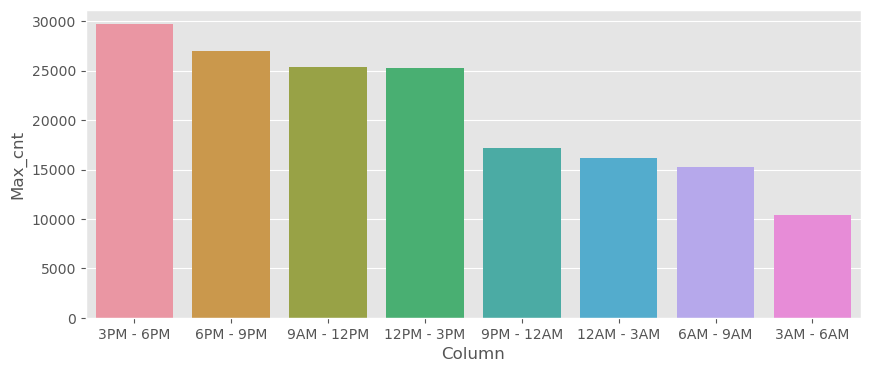

In [38]:
#Plot the max_cnt of the crime
plt.figure(figsize=(10, 4))
sns.barplot(data=max_crimes.sort_values('Max_cnt', ascending=False), x='Column', y='Max_cnt')